In [1]:
#대소문자 변환
s = "Hello World"
print(s.lower()) # 소문자로 변환
print(s.upper()) # 대문자로 변환

hello world
HELLO WORLD


In [2]:
#숫자, 문장부호, 특수문자 제거
import re
# 숫자제거
p = re.compile("[0-9]+")
result = p.sub("", "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다.")
print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다.


In [3]:
# 특수문자 제거
def clean_text(input_data):
    # 텍스트에 포함된 숫자와 특수문자 제거
    p = re.compile("[0-9_!@#$%^&*]")
    result = p.sub("", input_data)
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"
print(txt)
print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [4]:
#불용어 처리
words=["추석", "연휴", "민족", "대이동", "시작", "늘어", "교통량", "교통사고", 
       "특히", "자동차", "고장", "상당수", "나타", "것", "기자"]
# 불용어
stopwords = ["가다", "늘어", "나타", "것", "기자"]

# 불용어 제거
[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [5]:
#영어 불용어 처리
# 불용어 사전 다운로드
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

words = ["chief", "justice", "roberts", ",", "president", "carter", ",", 
         "president", "clinton", "president", "bush", "obama", "fellow", 
         "americans", "and", "people", "of", "the", "world", "thank", "you"]

# 불용어 제거
[w for w in words if not w in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [6]:
# 문장 tokenizer 다운로드
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
#어근 동일화 처리
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stm = PorterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

cook cooker cook cook cookeri 

In [8]:
stm = PorterStemmer()
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=" ")

python python python python python 

In [9]:
#LancasterStemmer: PorterStemmer와 비슷하지만 좀 더 나은 성능
from nltk.stem.lancaster import LancasterStemmer
stm = LancasterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=' ')

cook cook cook cook cookery 

In [10]:
stm = LancasterStemmer()
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=" ")

python python python python python 

In [11]:
#Porter나 Lancaster가 처리하지 못하는 경우: RegexpStemmer로 특정한 표현식 일괄 제거
from nltk.stem.regexp import RegexpStemmer
stm = RegexpStemmer('ing')
print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))

cook
cookery
leside


In [12]:
stm = RegexpStemmer('python')
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w), end=" ")

ing s Python ers ed 

In [13]:
#N-gram: n번 연이어 등장하는 단어들의 연쇄
txt = 'Hello'

# 2-gram
for i in range(len(txt) - 1):
    # 현재 문자와 그 다음 문자 출력
    print(txt[i], txt[i + 1], sep='')

He
el
ll
lo


In [14]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리 후 리스트로 저장
words = txt.split()

# 2-gram
for i in range(len(words) - 1):
    print(words[i], words[i + 1])

this is
is python
python script


In [26]:
txt = 'hello'

# 글자기준 2-gram
two_gram = zip(txt, txt[1:])
for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [27]:
txt = 'this is python script'

# 단어기준 2-gram
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [15]:
from nltk import ngrams
sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(), 2)
for gram in grams:
    print(gram, end=' ')

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [16]:
sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(), 3)
for gram in grams:
    print(gram, end=' ')

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [17]:
#한국어 처리
# 헌법 말뭉치
from konlpy.corpus import kolaw
# 말뭉치에 포함된 파일 목록
kolaw.fileids()

['constitution.txt']

In [18]:
# 헌법
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [19]:
# 국회 의안 말뭉치
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [20]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [29]:
#품사 분석 - 한나눔 패키지
from konlpy.tag import Hannanum
han = Hannanum()
txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,
    위안화 환율이 11년 만에 달러당 7위안을 넘었다.
    원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

# 형태소 분석
print(han.morphs(txt))

['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']


In [30]:
# 명사 추출
print(han.nouns(txt))

['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']


In [31]:
# 품사태깅
print(han.pos(txt))

[('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]


In [35]:
# 품사 목록
print(han.tagset)

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [32]:
#품사 분석 - 꼬꼬마 패키지
from konlpy.tag import Kkma
kkm = Kkma()
# 형태소 분석
print(kkm.morphs(txt))

['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']


In [33]:
# 명사 추출
print(kkm.nouns(txt))

['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']


In [34]:
# 품사태깅
print(kkm.pos(txt))

[('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('원', 'NNM'), ('/', 'SP'), ('엔', 'NNG'), ('재정', 'NNG'), ('환율', 'NNG'), ('역시', 'MAG'), ('100', 'NR'), ('엔', 'NNM'), ('당', 'NNG'), ('30', 'NR'), ('원', 'NNM'), ('가까이', 'MAG'), ('뛰', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [36]:
# 품사 목록
print(kkm.tagset)

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [37]:
#품사 분석 - 트위터 패키지
from konlpy.tag import Okt
okt = Okt()
# 형태소 분석
print(okt.morphs(txt))

['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n    ', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n    ', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']


In [38]:
# 명사 추출
print(okt.nouns(txt))

['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']


In [39]:
# 품사태깅
print(okt.pos(txt))

[('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n    ', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n    ', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'Noun'), ('뛰었다', 'Verb'), ('.', 'Punctuation')]


In [40]:
# 품사 목록
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [41]:
# 어구 추출
print(okt.phrases(txt))

['달러', '달러 환율', '3년', '3년 5개월', '최고치', '마감', '위안화', '위안화 환율', '11년', '달러당', '달러당 7위안', '재정환율', '재정환율 역시', '재정환율 역시 100엔', '30원', '30원 가까이', '환율', '개월', '최고', '7위안', '재정', '역시', '100엔', '가까이']


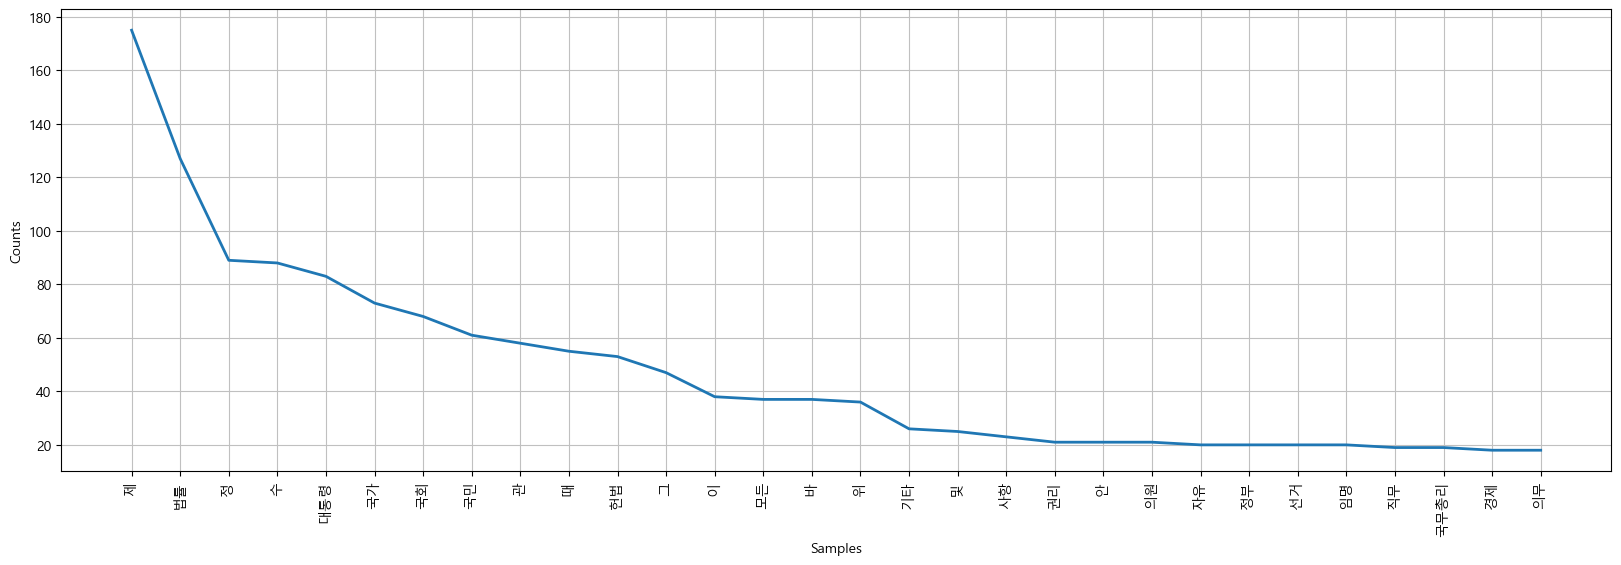

In [42]:
# 단어 출현 빈도
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from nltk import Text
plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name='kolaw')
kolaw.plot(30)
plt.show()

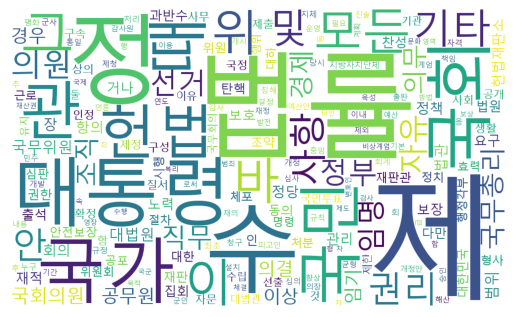

In [43]:
#워드클라우드
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'
wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()

In [46]:
#영어 품사 분석
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
a = "I love you."
tags = pos_tag(a.split())
print(tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


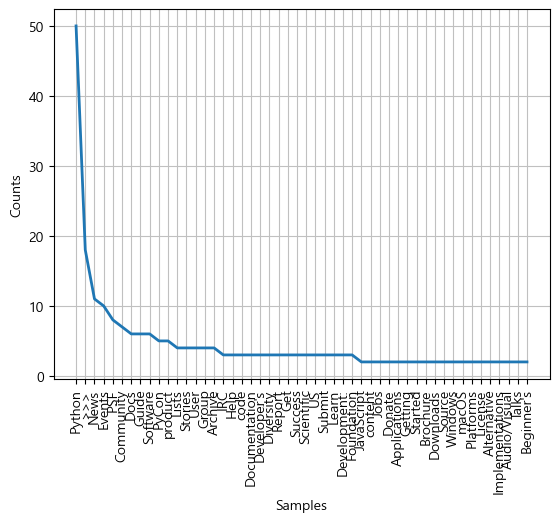

In [47]:
#특정 사이트의 단어빈도 확인
from bs4 import BeautifulSoup
import urllib
res = urllib.request.urlopen('http://python.org/')
html = res.read()

# 알파벳, 숫자, _ 만 선택
tokens = re.split('\W+', html.decode('utf-8'))
clean = BeautifulSoup(html, 'html.parser').get_text()
tokens = [token for token in clean.split()]
stop = set(stopwords.words('english'))
clean_tokens = [token for token in tokens 
                if len(token.lower()) > 1 and (token.lower() not in stop)]
tagged = nltk.pos_tag(clean_tokens)

# 보통명사, 고유명사만 추출
allnoun = [word for word, pos in tagged if pos in ['NN', 'NNP']]
freq_result = nltk.FreqDist(allnoun)
freq_result.plot(50, cumulative=False)
plt.show()